In [1]:
data=pd.read_excel("E:\HTL Project\Dataset 1.xlsx")
data.head()

<IPython.core.display.Javascript object>

,Feedstock,C,H,N,O,S,Temp,Time,Catalyst,Pressure,HHV,ERR,Yield%
0,Spirulina platensis,72.7,8.8,6.3,11.5,0.6,300,30,Na2CO3,130,35.2,37.2,36.0
1,Nannochloropsis,76.0,10.3,3.9,9.0,0.8,350,60,H-ZSM5,180,37.9,42.7,43.0
2,Chlorella vulgaris,70.6,9.2,5.5,12.3,0.4,250,60,LiOH,100,33.8,33.0,33.0
3,Porphyridium purpureum,69.1,8.4,5.0,15.2,0.5,250,30,NaN,100,34.8,41.5,24.7
4,Dunaliella tertiolecta,72.0,8.8,6.2,9.9,0.3,375,50,Na2CO3,221,36.0,64.8,55.3


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Feedstock']=le.fit_transform(data['Feedstock'])
data['Catalyst']=le.fit_transform(data['Catalyst'])

In [3]:
data['S']=data['S'].fillna(data['S'].mode()[0])
data['ERR']=data['ERR'].fillna(data['ERR'].mode()[0])

In [16]:
x=data.drop('Yield%',axis=1)
y=data['Yield%']
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
y_pred
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
reg1=linear_model.LinearRegression()
reg1.fit(x_train,y_train)
y_pred1 = reg1.predict(x_train)
y_pred
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  7.810798710803262


<IPython.core.display.Javascript object>

Root mean square error:  0.07602116742597663
R2 square:  -0.2818258096720301


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  5.477648131810101


<IPython.core.display.Javascript object>

Root mean square error:  3.755766769757238e-29
R2 square:  0.4031377727834512


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

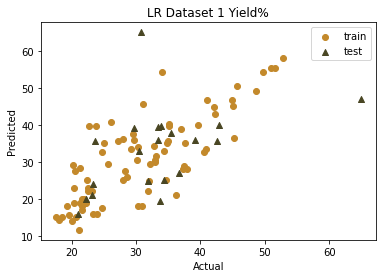

In [19]:
plt.scatter(y_pred1,y_train,label='train',color='#c3892b')
plt.scatter(y_pred,y_test,label='test',color='#494623',marker ="^")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("LR Dataset 1 Yield%")
plt.legend()